The basic idea is the same of minimizing the corst fuction and get the optimal intecept and slope

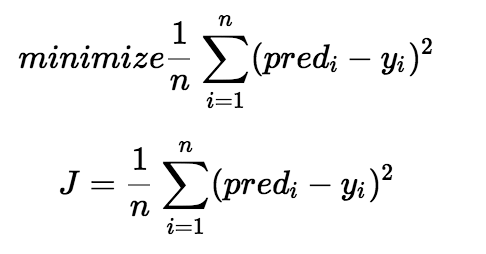 

but here considering the final formula:

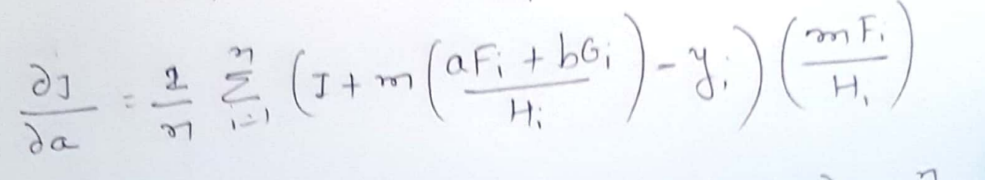

and we get:

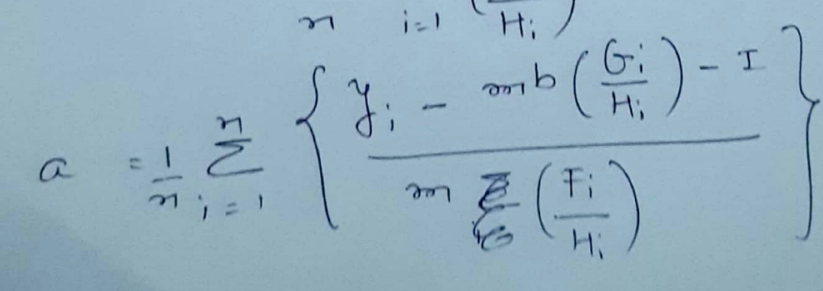

In [16]:
import pandas as pd
import numpy as np 

filename = "./data/OAD.xlsx"
atomicsheetname = "OAD"
materisheetname = "MaterialData"

xls = pd.ExcelFile(filename)
matdata = pd.read_excel(xls, materisheetname)
atodata = pd.read_excel(xls, atomicsheetname)

yi = matdata["DE"].values
atomsa = matdata["A"].values
atomsb = matdata["B"].values

Consider the first formula: (rp_B^3 - exp(rs_B))/((rp_A^2))


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import math

rp_bi = []
rs_bi = []
rp_ai = []
xi = []

for a, b in zip(atomsa, atomsb):
    a = a.replace(" ", "")
    b = b.replace(" ", "")
    
    rp_bi.append(atodata[atodata["A"] == b]["rp"].values[0])
    rs_bi.append(atodata[atodata["A"] == b]["rs"].values[0])
    rp_ai.append(atodata[atodata["A"] == a]["rp"].values[0])
    xi.append((rp_bi[-1]**3 - math.exp(rs_bi[-1]))/rp_ai[-1]**2)
    
#Linear regression
regressor = LinearRegression()
regressor.fit((np.array(xi)).reshape(-1,1), yi)
y_pred = regressor.predict((np.array(xi)).reshape(-1,1))
mse = mean_squared_error(yi, y_pred)
slope = regressor.coef_[0]
inter = regressor.intercept_
print(mse, slope, inter)

0.014222705127012937 -0.7507116478782628 -0.31702207185307846


In [26]:
dim = len(yi)
for i in range(dim):
    continue # TODO 